In [7]:
from classes.data_loader_logit_multiclass import DataLoader
from classes.logit_multiclass import Logit
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# long time to run
data = DataLoader("usa.csv")

/Users/mia/Desktop/36490/classes/data_loader_logit_multiclass.py:18: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data: DataFrame = pd.read_csv(csv_file_path)


In [8]:
def get_top_10_percent_indices(arr):
    # Calculate the number of elements corresponding to the top 10%
    top_10_percent = int(0.1 * len(arr))
    
    # Create an array of indices from 0 to len(arr) - 1
    indices = np.arange(len(arr))
    
    # Shuffle the indices randomly
    np.random.shuffle(indices)
    
    # Use argsort to sort the shuffled indices based on the corresponding elements in arr
    sorted_indices = indices[np.argsort(arr[indices])]
    
    # Get the indices of the top 10% values
    top_10_percent_indices = sorted_indices[-top_10_percent:]
    
    return top_10_percent_indices

def get_bottom_10_percent_indices(arr):
    # Calculate the number of elements corresponding to the bottom 10%
    bottom_10_percent = int(0.1 * len(arr))
    
    # Create an array of indices from 0 to len(arr) - 1
    indices = np.arange(len(arr))
    
    # Shuffle the indices randomly
    np.random.shuffle(indices)
    
    # Use argsort to sort the shuffled indices based on the corresponding elements in arr
    sorted_indices = indices[np.argsort(arr[indices])]
    
    # Get the indices of the bottom 10% values
    bottom_10_percent_indices = sorted_indices[:bottom_10_percent]
    
    return bottom_10_percent_indices

In [9]:
#for asset allocation:
i=0
ALPHA_VALUES = list(np.logspace(-4, 4, 5)) # [0.0001, 0.001, ..., 10000]
YEAR = 10000
validation_r2s = []
test_r2s = []
predictions = []
alphas = []
models = []
rets_ls_vw = []
rets_l_vw = []
for train_start in tqdm(range(19800101, 20000101 + 2 * YEAR, YEAR)):
    train_end = train_start + 10 * YEAR
    validate_start = train_end
    validate_end = validate_start + 5 * YEAR
    test_start = validate_end
    test_end = test_start + YEAR

    # let validation choose the best lambda from grid search
    best_model, best_accuracy, best_alpha= Logit.validate(data, train_start, train_end, 
                                                                             validate_start, validate_end,ALPHA_VALUES)
    validation_r2s.append(best_accuracy)
    alphas.append(best_alpha)
    models.append(best_model)
    

    test_accuracy,y_test,y_pred, size_train  = Logit.evaluate( data, best_model, test_start, test_end)

    print(best_accuracy,best_alpha, test_accuracy)

    pred_true_combined = np.vstack((y_pred,y_test,size_train)).T
    pred_true_combined = pd.DataFrame(pred_true_combined)
    pred_true_combined.columns = ["pred","true","size"]
    pred_true_combined['true_size'] = pred_true_combined[["true"]].multiply(pred_true_combined["size"], axis="index")
    pred_true_combined = np.array(pred_true_combined)

    num_stocks = pred_true_combined.shape[0] // 10
    highest_indices = get_top_10_percent_indices(pred_true_combined[:,0])
    lowest_indices = get_bottom_10_percent_indices(pred_true_combined[:,0])

    
    rets_ls_vw.append(0.5*(np.sum(pred_true_combined[highest_indices,3])/np.sum(pred_true_combined[highest_indices,2]) - 
                     np.sum(pred_true_combined[lowest_indices,3])/np.sum(pred_true_combined[lowest_indices,2])) )
    print(rets_ls_vw)
    rets_l_vw.append(np.sum(pred_true_combined[highest_indices,3])/np.sum(pred_true_combined[highest_indices,2]))
    print(rets_l_vw)
    i+=1

  5%|▍         | 1/22 [00:48<17:08, 48.98s/it]

0.1040722993343917 0.0001 0.11028460543337645
[-0.015474453554259249]
[5.587592965142467]


  9%|▉         | 2/22 [01:37<16:12, 48.63s/it]

0.10102538300050315 0.0001 0.10351049628119179
[-0.015474453554259249, 0.0271341778048515]
[5.587592965142467, 5.612929419757164]


 14%|█▎        | 3/22 [02:33<16:31, 52.21s/it]

0.10113158596530505 0.0001 0.09875448537663309
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197]
[5.587592965142467, 5.612929419757164, 5.568626585393608]


 18%|█▊        | 4/22 [03:32<16:23, 54.62s/it]

0.10035372399633909 0.0001 0.10000975840965803
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199]


 23%|██▎       | 5/22 [04:27<15:34, 54.96s/it]

0.10265198817927121 0.0001 0.09992514420748265
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586]


 27%|██▋       | 6/22 [05:24<14:50, 55.68s/it]

0.10176680902353234 0.0001 0.10010732172668733
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533]


 32%|███▏      | 7/22 [06:39<15:29, 61.96s/it]

0.10423037276344811 0.0001 0.10403717151824728
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596]


 36%|███▋      | 8/22 [08:00<15:49, 67.85s/it]

0.14057019646816438 0.0001 0.14546762589928058
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525]


 41%|████      | 9/22 [09:15<15:13, 70.31s/it]

0.14156093152759291 0.0001 0.14037913036729466
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419]


 45%|████▌     | 10/22 [10:44<15:13, 76.09s/it]

0.1415468807954346 0.0001 0.14916546466103442
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705]


 50%|█████     | 11/22 [12:04<14:09, 77.27s/it]

0.1437899865509656 0.0001 0.13976906827457494
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798]


 55%|█████▍    | 12/22 [13:19<12:45, 76.56s/it]

0.14431528000475088 0.0001 0.14117815095186598
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754]


 59%|█████▉    | 13/22 [14:35<11:28, 76.45s/it]

0.14320324183130323 0.0001 0.13510377723346656
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347, 0.09053060221532672]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754, 5.74853771665485]


 64%|██████▎   | 14/22 [15:51<10:09, 76.14s/it]

0.14110868773503452 0.0001 0.13430961452502074
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347, 0.09053060221532672, 0.2392903102296957]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754, 5.74853771665485, 5.7849666494416505]


 68%|██████▊   | 15/22 [16:59<08:35, 73.64s/it]

0.13985847778134525 0.0001 0.1320924318161887
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347, 0.09053060221532672, 0.2392903102296957, -0.07873072422573735]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754, 5.74853771665485, 5.7849666494416505, 5.504438274280141]


 73%|███████▎  | 16/22 [18:05<07:08, 71.36s/it]

0.13656222166878426 0.0001 0.13423617147824496
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347, 0.09053060221532672, 0.2392903102296957, -0.07873072422573735, 0.012880660665323784]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754, 5.74853771665485, 5.7849666494416505, 5.504438274280141, 5.621308819542038]


 77%|███████▋  | 17/22 [19:11<05:48, 69.75s/it]

0.1290617533145287 0.0001 0.13113209768964462
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347, 0.09053060221532672, 0.2392903102296957, -0.07873072422573735, 0.012880660665323784, 0.20669498226722371]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754, 5.74853771665485, 5.7849666494416505, 5.504438274280141, 5.621308819542038, 5.7536274433174075]


 82%|████████▏ | 18/22 [20:21<04:40, 70.01s/it]

0.1188495850161999 0.0001 0.12023488640739315
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347, 0.09053060221532672, 0.2392903102296957, -0.07873072422573735, 0.012880660665323784, 0.20669498226722371, 0.12299902845105048]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754, 5.74853771665485, 5.7849666494416505, 5.504438274280141, 5.621308819542038, 5.7536274433174075, 5.681896950957241]


 86%|████████▋ | 19/22 [21:24<03:23, 67.70s/it]

0.13897966594045025 0.0001 0.14599426711363747
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347, 0.09053060221532672, 0.2392903102296957, -0.07873072422573735, 0.012880660665323784, 0.20669498226722371, 0.12299902845105048, 0.06964965497960574]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754, 5.74853771665485, 5.7849666494416505, 5.504438274280141, 5.621308819542038, 5.7536274433174075, 5.681896950957241, 5.546757613745611]


 91%|█████████ | 20/22 [22:31<02:15, 67.58s/it]

0.12085965362112772 0.0001 0.12153976107155787
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347, 0.09053060221532672, 0.2392903102296957, -0.07873072422573735, 0.012880660665323784, 0.20669498226722371, 0.12299902845105048, 0.06964965497960574, 0.2449848352684092]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754, 5.74853771665485, 5.7849666494416505, 5.504438274280141, 5.621308819542038, 5.7536274433174075, 5.681896950957241, 5.546757613745611, 5.813866567966035]


 95%|█████████▌| 21/22 [23:37<01:07, 67.22s/it]

0.12157677532235366 0.0001 0.121458710066305
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347, 0.09053060221532672, 0.2392903102296957, -0.07873072422573735, 0.012880660665323784, 0.20669498226722371, 0.12299902845105048, 0.06964965497960574, 0.2449848352684092, 0.28651997503963855]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754, 5.74853771665485, 5.7849666494416505, 5.504438274280141, 5.621308819542038, 5.7536274433174075, 5.681896950957241, 5.546757613745611, 5.813866567966035, 5.750606333887269]


100%|██████████| 22/22 [24:36<00:00, 67.11s/it]

0.13647329175963538 0.0001 0.13759826766464248
[-0.015474453554259249, 0.0271341778048515, -0.017962029668422197, -0.033054814144623634, -0.02830667964124345, -0.0036734057745060333, 0.06746333092841983, 0.4207414362957924, -0.22916338225527344, 0.2893157375926556, 0.01938725723550938, 0.20049089684245347, 0.09053060221532672, 0.2392903102296957, -0.07873072422573735, 0.012880660665323784, 0.20669498226722371, 0.12299902845105048, 0.06964965497960574, 0.2449848352684092, 0.28651997503963855, 0.0264200103787533]
[5.587592965142467, 5.612929419757164, 5.568626585393608, 5.582208766550199, 5.492357187095586, 5.564746348223533, 5.538576858026596, 5.6860204249467525, 5.301973261240419, 5.764531331386705, 5.512478303306798, 5.70891584795754, 5.74853771665485, 5.7849666494416505, 5.504438274280141, 5.621308819542038, 5.7536274433174075, 5.681896950957241, 5.546757613745611, 5.813866567966035, 5.750606333887269, 5.540061100503263]


In [39]:
ls =[0.10961574042274252, 0.12984835297384328, 0.14114773046563148,
    -0.05015169677120962,0.06034650715296053, 0.023878067585572094
,0.05224808448182569,0.03342385428667147,0.07370902843812357
,-0.017706425735229875 ,0.009840980344569511,0.07737091901571563
,0.060852675098460346 ,0.026119682521384913,0.08413135202015223
,0.07175531648160255,0.007949224761820639,0.07188647914216748
]


In [18]:
len(obj_month_list)

18022

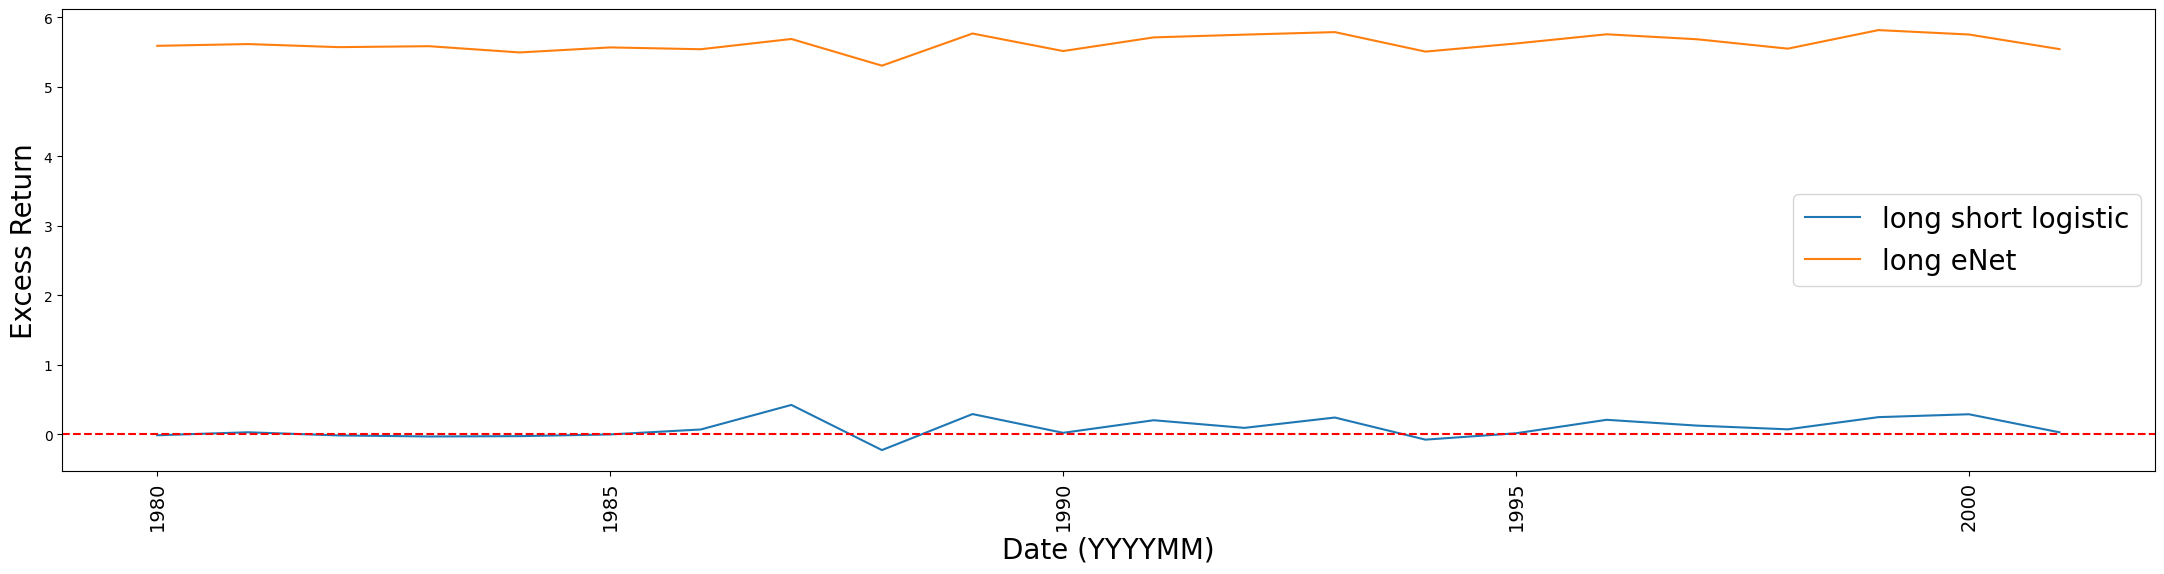

In [20]:
plt.figure(figsize=(27, 6))
obj_month_list =  list(range(1980, 2002))
plt.plot(obj_month_list, rets_ls_vw, label="long short logistic")
plt.plot(obj_month_list, rets_l_vw, label="long logistic")
plt.axhline(0, color='r', linestyle="--")
# plt.plot(test_months, validation_r2s, label="R^2 in validation years")
plt.xticks(obj_month_list[::5], rotation='vertical', fontsize=14)
plt.xlabel('Date (YYYY)', fontsize=20)
plt.ylabel('Excess Return', fontsize=20)
plt.legend(fontsize=20)
plt.show()

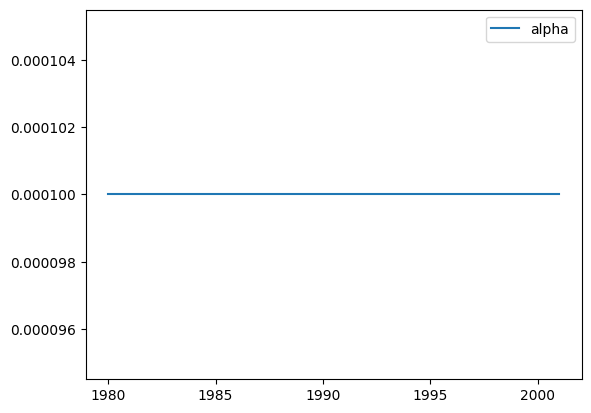

In [23]:
test_years = list(range(1980, 2002))

plt.plot(test_years, alphas, label="alpha" )
plt.legend()
plt.show()

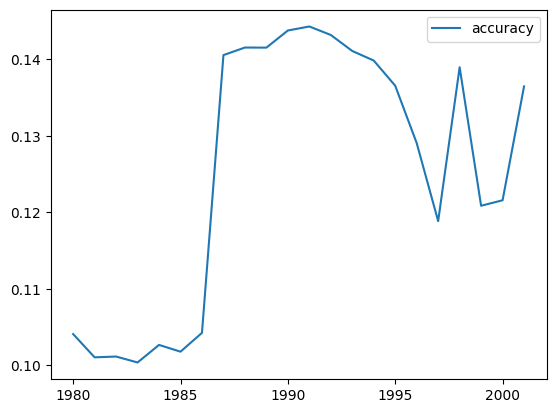

In [24]:
test_years = list(range(1980, 2002))

plt.plot(test_years, validation_r2s, label="accuracy" )
plt.legend()
plt.show()

In [32]:
l=[0.5814230368809092,0.6168620056710141,0.6323709547027757,
0.4450952454061641,0.5404906483437268,0.5183952133183335,
0.5444314387705584,0.536572954228442,0.5761734860499974,
0.47541693276986113,0.47879688965688794,0.5772182137504216,
0.5440983666928959,0.5258377455254072,0.5979940069416547,
0.5565029396367339,0.4798243112246276,0.5944737820294378]

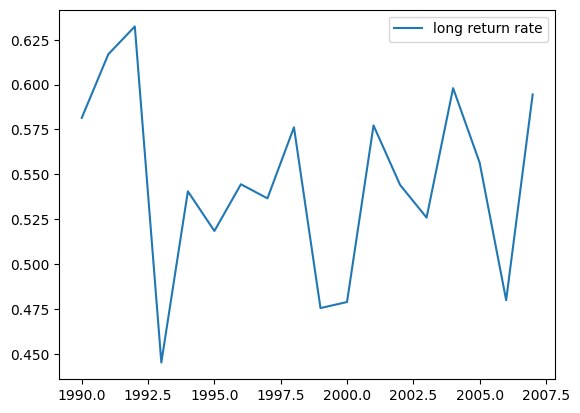

In [41]:
test_years = list(range(1990, 2008))

pyplot.plot(test_years, l, label="long return rate")
pyplot.legend()
pyplot.show()

In [22]:
rets_l_vw

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.59447378])

In [23]:
rets_ls_vw


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07188648])

In [3]:

YEAR = 10000
test_accuracy_list= [ ]
train_accuracy_list= [ ]

for train_start in tqdm(range(19800101, 20080101, YEAR)):
    train_end = train_start + 10 * YEAR
    test_start = train_end
    test_end = test_start + 1 * YEAR

    # let validation choose the best lambda from grid search
    train_accuracy,test_accuracy, y_proba= Logit.validate(data, train_start, train_end, test_start, test_end)
    print(train_accuracy,test_accuracy)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)


  0%|          | 0/28 [00:00<?, ?it/s]

fit


  4%|▎         | 1/28 [01:41<45:40, 101.50s/it]

0.5491032224635901 0.5523811377303778
fit


  7%|▋         | 2/28 [03:11<41:05, 94.83s/it] 

0.5518680723510351 0.5334574963416256
fit


 11%|█         | 3/28 [04:44<39:11, 94.06s/it]

0.5495971633115645 0.5468988113380067
fit


 14%|█▍        | 4/28 [06:26<38:51, 97.13s/it]

0.5498916504845962 0.5360143206550636
fit


 18%|█▊        | 5/28 [25:55<3:05:23, 483.64s/it]

0.5489292248835662 0.5418043943223799
fit


 21%|██▏       | 6/28 [27:12<2:06:36, 345.29s/it]

0.5467889689583119 0.5411507423150372
fit


 25%|██▌       | 7/28 [32:59<2:01:01, 345.79s/it]

0.5451631529500546 0.5399973594261153
fit


 29%|██▊       | 8/28 [50:48<3:12:04, 576.24s/it]

0.5438682714080805 0.5586805026392718
fit


 32%|███▏      | 9/28 [53:08<2:19:15, 439.76s/it]

0.5464124444228564 0.5410480531972732
fit


 36%|███▌      | 10/28 [55:07<1:42:12, 340.68s/it]

0.545431381202588 0.5118228119358295
fit


 39%|███▉      | 11/28 [57:59<1:21:54, 289.07s/it]

0.5417472062577245 0.5650190794180777
fit


 43%|████▎     | 12/28 [1:00:24<1:05:26, 245.41s/it]

0.5437076994978622 0.5668502677087821
fit


 46%|████▋     | 13/28 [1:03:20<56:05, 224.40s/it]  

0.5469314358040317 0.5729496402877697
fit


 50%|█████     | 14/28 [1:06:14<48:45, 208.99s/it]

0.5488475553179593 0.4792099187023419
fit


 54%|█████▎    | 15/28 [1:08:58<42:21, 195.50s/it]

0.5446004448358642 0.5360395631568102
fit


 57%|█████▋    | 16/28 [1:11:51<37:43, 188.63s/it]

0.5442419358661389 0.5109005516930207
fit


 61%|██████    | 17/28 [1:14:12<31:58, 174.44s/it]

0.5421194638751333 0.5243322655022546
fit


 64%|██████▍   | 18/28 [1:16:29<27:12, 163.27s/it]

0.5408659156174067 0.5224098663572687
fit


 68%|██████▊   | 19/28 [1:18:35<22:46, 151.79s/it]

0.5372626226773697 0.5449011302441412
fit


 71%|███████▏  | 20/28 [1:20:31<18:48, 141.04s/it]

0.5374002832731759 0.49543979654476894
fit


 75%|███████▌  | 21/28 [1:22:26<15:32, 133.28s/it]

0.5378285962611692 0.5136569520062223
fit


 79%|███████▊  | 22/28 [1:24:04<12:16, 122.81s/it]

0.5316727909639684 0.5351499022632533
fit


 82%|████████▏ | 23/28 [1:25:43<09:38, 115.70s/it]

0.5277317664653773 0.5253658067000385
fit


 86%|████████▌ | 24/28 [1:27:20<07:20, 110.05s/it]

0.5252109429975103 0.5131419132293641
fit


 89%|████████▉ | 25/28 [1:29:12<05:32, 110.70s/it]

0.5277884162473643 0.5479425606371425
fit


 93%|█████████▎| 26/28 [1:30:53<03:35, 107.67s/it]

0.5281454103136858 0.5332452357768813
fit


 96%|█████████▋| 27/28 [1:33:02<01:54, 114.03s/it]

0.5306517574489477 0.5171350562538248
fit


100%|██████████| 28/28 [1:34:39<00:00, 202.85s/it]

0.5300344991645273 0.5325125882381285


In [4]:
test_accuracy_list

[0.5523811377303778,
 0.5334574963416256,
 0.5468988113380067,
 0.5360143206550636,
 0.5418043943223799,
 0.5411507423150372,
 0.5399973594261153,
 0.5586805026392718,
 0.5410480531972732,
 0.5118228119358295,
 0.5650190794180777,
 0.5668502677087821,
 0.5729496402877697,
 0.4792099187023419,
 0.5360395631568102,
 0.5109005516930207,
 0.5243322655022546,
 0.5224098663572687,
 0.5449011302441412,
 0.49543979654476894,
 0.5136569520062223,
 0.5351499022632533,
 0.5253658067000385,
 0.5131419132293641,
 0.5479425606371425,
 0.5332452357768813,
 0.5171350562538248,
 0.5325125882381285]

In [5]:
train_accuracy_list

[0.5491032224635901,
 0.5518680723510351,
 0.5495971633115645,
 0.5498916504845962,
 0.5489292248835662,
 0.5467889689583119,
 0.5451631529500546,
 0.5438682714080805,
 0.5464124444228564,
 0.545431381202588,
 0.5417472062577245,
 0.5437076994978622,
 0.5469314358040317,
 0.5488475553179593,
 0.5446004448358642,
 0.5442419358661389,
 0.5421194638751333,
 0.5408659156174067,
 0.5372626226773697,
 0.5374002832731759,
 0.5378285962611692,
 0.5316727909639684,
 0.5277317664653773,
 0.5252109429975103,
 0.5277884162473643,
 0.5281454103136858,
 0.5306517574489477,
 0.5300344991645273]

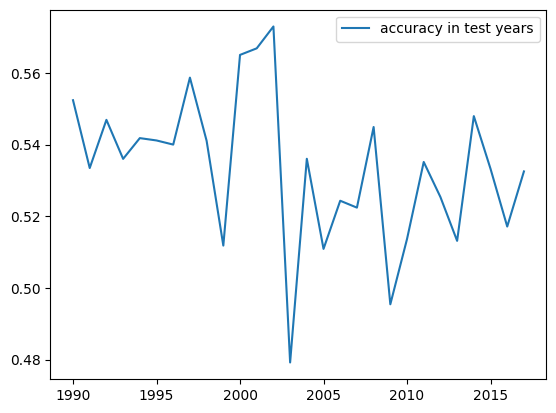

In [6]:
test_years = list(range(1990, 2018))

pyplot.plot(test_years, test_accuracy_list, label="accuracy in test years")
pyplot.legend()
pyplot.show()